In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Read the Data

In [2]:
iris = pd.read_csv('../datasets/iris.csv')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Take backup of datasets
data = iris.copy()

## Encode the categorical column

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le = LabelEncoder()

In [7]:
enc_species = le.fit_transform(data['species'])
enc_species

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
data.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [9]:
data['species'] = enc_species
data.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


## Split the data

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = data.iloc[:,:4]
y = data['species']

In [12]:
X.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [13]:
y.head(3)

0    0
1    0
2    0
Name: species, dtype: int32

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

### Build the model

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
model = DecisionTreeClassifier(max_depth=8,criterion='entropy')

In [17]:
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

## Get Training and Testing Metrics

In [18]:
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report, roc_curve,roc_auc_score

In [19]:
train_pred = model.predict(X_train)
train_pred

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [20]:
confusion_matrix(y_train,train_pred)

array([[40,  0,  0],
       [ 0, 41,  0],
       [ 0,  0, 39]], dtype=int64)

In [21]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        39

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [22]:
test_pred = model.predict(X_test)

In [23]:
confusion_matrix(y_test,test_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [24]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Later : -- Plot the AUC and ROC curve

## Visualize the tree

In [25]:
from sklearn.tree import plot_tree

In [26]:
fnames = iris.columns.values
fnames

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'], dtype=object)

In [27]:
cname = iris['species'].unique()
cname

array(['setosa', 'versicolor', 'virginica'], dtype=object)

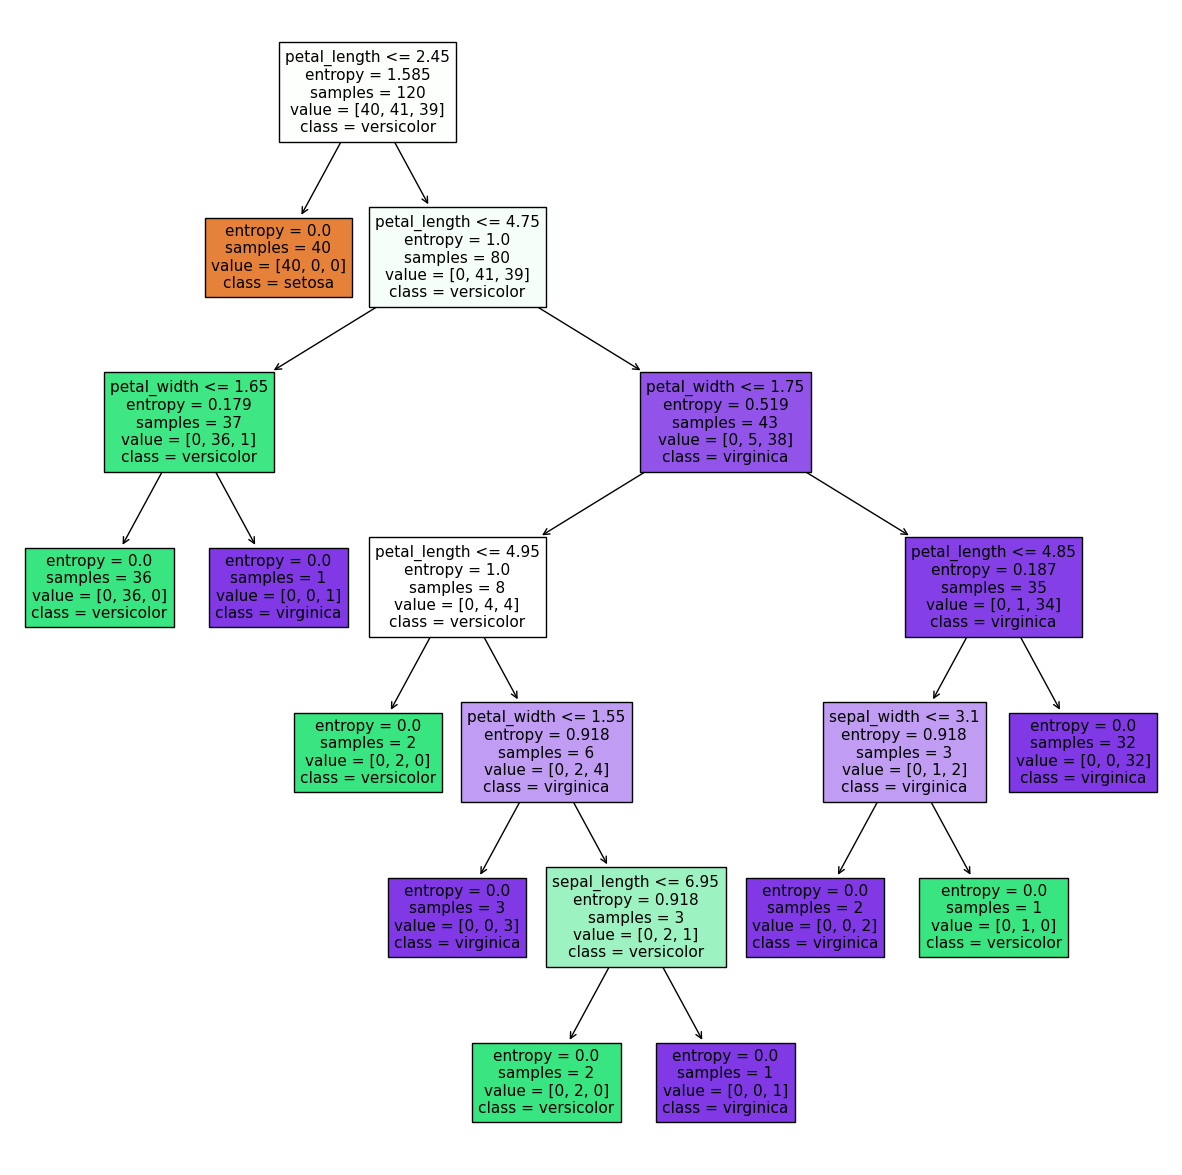

In [28]:
plt.figure(figsize=(15,15))
plot_tree(model,feature_names=fnames,class_names=cname,filled=True)
plt.show()

## Regression 

In [29]:
pdata = pd.read_csv('../datasets/pollution.csv')

In [30]:
pdata.head()

,Pollution,Temp,Industry,Population,Wind,Rain,WetDays
0,24,61.5,368,497,9.1,48.34,115
1,30,55.6,291,593,8.3,43.11,123
2,56,55.9,775,622,9.5,35.89,105
3,28,51.0,137,176,8.7,15.17,89
4,14,68.4,136,529,8.8,54.47,116


### Split the Data 

In [31]:
X = pdata.iloc[:,1:]
Y = pdata.iloc[:,0]

In [32]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((32, 6), (9, 6), (32,), (9,))

## Build model

In [33]:
from sklearn.tree import DecisionTreeRegressor

In [34]:
pmodel = DecisionTreeRegressor(max_depth = 3,criterion='squared_error')

In [35]:
pmodel.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=3)

## Get metrics for training data

In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
train_pred = pmodel.predict(X_train)

In [38]:
train_mse = mean_squared_error(Y_train,train_pred)
train_mse

122.78796600877192

In [39]:
train_rmse = np.sqrt(train_mse)
train_rmse

11.080973152605862

In [40]:
test_pred = pmodel.predict(X_test)

In [41]:
test_mse = mean_squared_error(Y_test, test_pred)
test_mse

692.3062181525939

In [42]:
test_rmse = np.sqrt(test_mse)
test_rmse

26.311712565939033